<a href="https://colab.research.google.com/github/shaynyx/marvel-level-2/blob/main/task_4_ensemble_techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ensemble Techniques**

Ensemble methods are techniques that create multiple models and then combine them to produce improved results. Ensemble methods in machine learning usually produce more accurate solutions than a single model would.

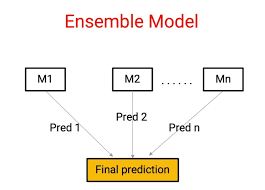

1. **Hard Voting**:
Definition: In hard voting, the final prediction is determined by a majority vote among the individual models. For classification tasks, the class that receives the most votes across all models is selected as the final prediction.

Usage: It is typically employed in classification problems where the individual models output discrete class labels.

Example:

Suppose you have three classifiers: Classifier A predicts Class 1, Classifier B predicts Class 2, and Classifier C predicts Class 1. In hard voting, the final prediction would be Class 1 because it has the majority of votes.


2. **Soft Voting:**
Definition: In soft voting, the final prediction is based on the average (or weighted average) of the predicted probabilities for each class across all individual models. The class with the highest average probability is selected as the final prediction.

Usage: It is used when the individual models can provide probability estimates for each class. It takes into account the confidence level of each model.

Example:

Suppose you have three classifiers: Classifier A predicts Class 1 with a probability of 0.8, Classifier B predicts Class 2 with a probability of 0.6, and Classifier C predicts Class 1 with a probability of 0.7. In soft voting, the final prediction would involve averaging these probabilities, and the class with the highest average probability might be selected.
When to Use Each:
Hard Voting:

Suitable for classifiers that provide discrete class labels.
Often used when the individual models have different strengths or weaknesses and may make errors on different instances.
Soft Voting:

Suitable when classifiers can provide probability estimates.
Takes into account the confidence of each classifier, which can be useful when the models have varying degrees of certainty.

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score

# Generating a simple dataset for illustration purposes
np.random.seed(42)
X = pd.DataFrame(np.random.rand(100, 5), columns=['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5'])
y = (X['Feature1'] + X['Feature2'] + X['Feature3'] > 1.5).astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create individual models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Create a VotingClassifier with hard voting (majority voting)
voting_model_hard = VotingClassifier(estimators=[('RandomForest', rf_model), ('GradientBoosting', gb_model)], voting='hard')

# Train the hard voting ensemble model on the training data
voting_model_hard.fit(X_train, y_train)

# Make predictions on the testing data using hard voting
voting_predictions_hard = voting_model_hard.predict(X_test)

# Evaluate the accuracy of the Hard Voting Ensemble
voting_accuracy_hard = accuracy_score(y_test, voting_predictions_hard)
print(f"Hard Voting Ensemble Accuracy: {voting_accuracy_hard * 100:.2f}%")

# Create a VotingClassifier with soft voting (averaging)
voting_model_soft = VotingClassifier(estimators=[('RandomForest', rf_model), ('GradientBoosting', gb_model)], voting='soft')

# Train the soft voting ensemble model on the training data
voting_model_soft.fit(X_train, y_train)

# Make predictions on the testing data using soft voting
voting_predictions_soft = voting_model_soft.predict(X_test)

# Evaluate the accuracy of the Soft Voting Ensemble
voting_accuracy_soft = accuracy_score(y_test, voting_predictions_soft)
print(f"Soft Voting Ensemble Accuracy: {voting_accuracy_soft * 100:.2f}%")


Hard Voting Ensemble Accuracy: 75.00%
Soft Voting Ensemble Accuracy: 80.00%


## **Bagging**

Bagging (Bootstrap Aggregating) is an ensemble learning technique that improves model robustness and generalization by training multiple models independently on different subsets of the training data created through bootstrap sampling (randomly selecting instances with replacement).

Each model, often a base classifier or regressor, introduces diversity due to its unique training set. The final prediction is typically aggregated through majority voting (hard voting for classification) or averaging (soft voting for regression).

 Bagging helps reduce overfitting, especially for high-variance models, and popular implementations include Random Forest, which extends bagging by introducing additional randomness in feature selection during tree construction. The ensemble's combined predictions lead to enhanced overall performance, making bagging a powerful tool in machine learning.

In [3]:
# Create an individual model (Random Forest in this case)
base_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Create a BaggingClassifier
bagging_model = BaggingClassifier(base_model, n_estimators=5, random_state=42)

# Train the bagging ensemble model on the training data
bagging_model.fit(X_train, y_train)

# Make predictions on the testing data
bagging_predictions = bagging_model.predict(X_test)

# Evaluate the accuracy of the Bagging Ensemble
bagging_accuracy = accuracy_score(y_test, bagging_predictions)
print(f"Bagging Ensemble Accuracy: {bagging_accuracy * 100:.2f}%")

Bagging Ensemble Accuracy: 80.00%


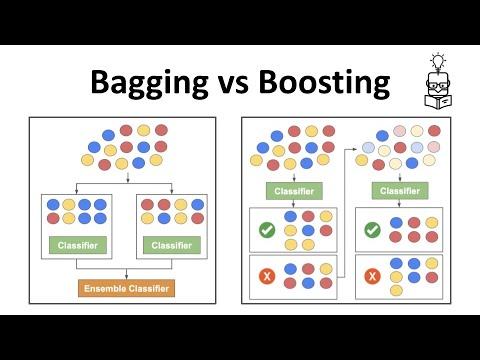

# **Boosting**

Boosting is an ensemble learning technique that combines multiple weak learners (usually simple models like decision trees) to create a strong learner. The primary objective of boosting is to improve the accuracy and generalization of the model by sequentially training models, giving more emphasis to instances that were misclassified by the previous models.

Start with an **initial weak learner** (e.g., a simple decision stump or a small tree).

The number of models used in boosting is a hyperparameter that can be tuned. Common **boosting algorithms**, such as AdaBoost, Gradient Boosting, XGBoost, LightGBM, and CatBoost, allow users to specify the number of boosting rounds or iterations.

In [5]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Create a weak learner (Decision Tree in this case)
base_model = DecisionTreeClassifier(max_depth=1, random_state=42)

# Create an AdaBoostClassifier
adaboost_model = AdaBoostClassifier(base_model, n_estimators=50, random_state=42)

# Train the AdaBoost ensemble model on the training data
adaboost_model.fit(X_train, y_train)

# Make predictions on the testing data
adaboost_predictions = adaboost_model.predict(X_test)

# Evaluate the accuracy of the AdaBoost Ensemble
adaboost_accuracy = accuracy_score(y_test, adaboost_predictions)
print(f"AdaBoost Ensemble Accuracy: {adaboost_accuracy * 100:.2f}%")

AdaBoost Ensemble Accuracy: 80.00%


# **Stacking**

Stacking is an ensemble learning technique that involves training multiple models, known as base models, and then combining their predictions using another model, called the meta-model or blender.

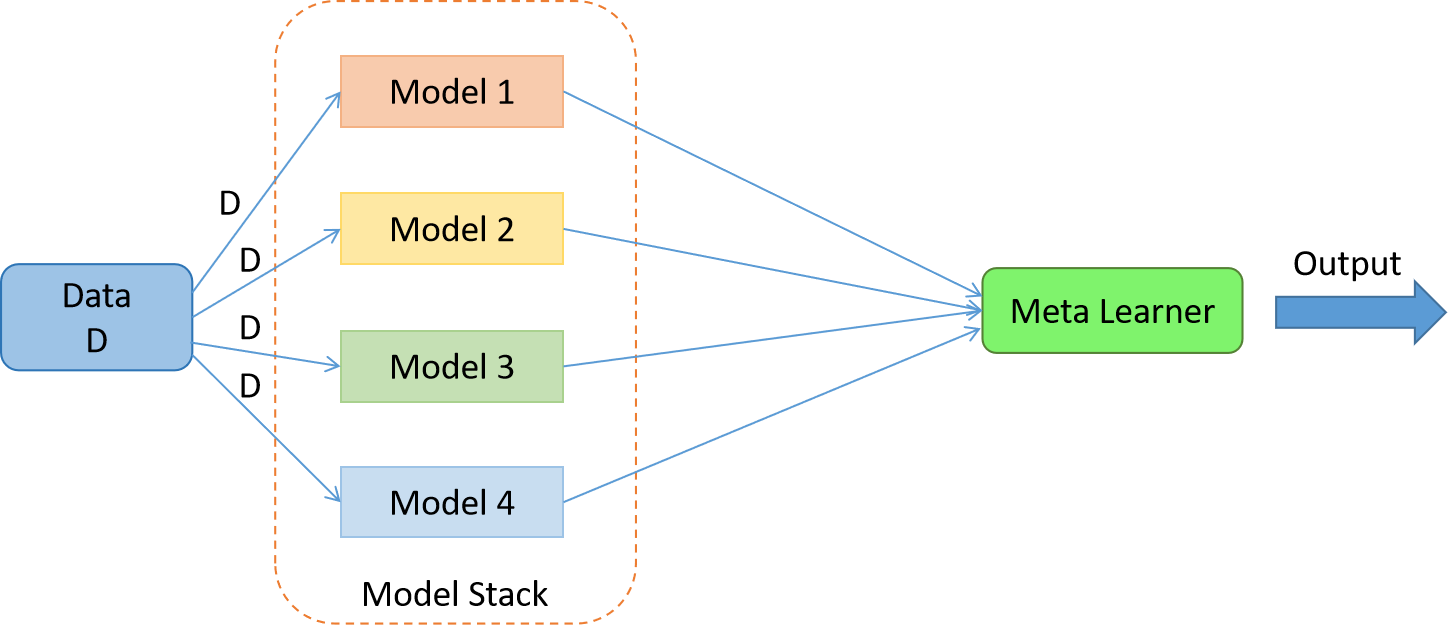

In [7]:
from sklearn.linear_model import LogisticRegression

# Create individual base models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train base models on the training data
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

# Make predictions on the testing data using base models
rf_predictions = rf_model.predict(X_test)
gb_predictions = gb_model.predict(X_test)

# Create a new DataFrame with base model predictions as features
stacking_features = pd.DataFrame({'RF_Predictions': rf_predictions, 'GB_Predictions': gb_predictions})

# Create a meta-model (e.g., Logistic Regression) for stacking
meta_model = LogisticRegression()

# Train the meta-model on the base model predictions
meta_model.fit(stacking_features, y_test)

# Make predictions on the testing data using the stacked model
stacking_predictions = meta_model.predict(stacking_features)

# Evaluate the accuracy of the Stacking Ensemble
stacking_accuracy = accuracy_score(y_test, stacking_predictions)
print(f"Stacking Ensemble Accuracy: {stacking_accuracy * 100:.2f}%")

Stacking Ensemble Accuracy: 80.00%
